In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import controller

BASE_SCENARIO = './world/ranked_ca_gb.lotus'

## Random Deployment

In [3]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
df = controller.main(BASE_SCENARIO+".pickle", all_asns, "protect_random", verbose=False)

0.8939600787032498
         0.0         0.1         0.2         0.3         0.4         0.5  \
count  100.0  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     0.0    0.106826    0.232829    0.327239    0.423826    0.512254   
std      0.0    0.265718    0.369301    0.421844    0.442727    0.438056   
min      0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.0    0.000000    0.000000    0.000000    0.005803    0.031336   
50%      0.0    0.000000    0.008234    0.043444    0.212607    0.500000   
75%      0.0    0.041302    0.311165    0.914907    1.000000    1.000000   
max      0.0    1.000000    1.000000    1.000000    1.000000    1.000000   

              0.6         0.7         0.8         0.9         1.0  
count  100.000000  100.000000  100.000000  100.000000  100.000000  
mean     0.531290    0.616911    0.728854    0.781536    0.858479  
std      0.441588    0.446263    0.411301    0.388431    0.333191  
min     -0.078947   -0.0

<AxesSubplot: xlabel='Global ASPV Deployment', ylabel='Avg. Improvement'>

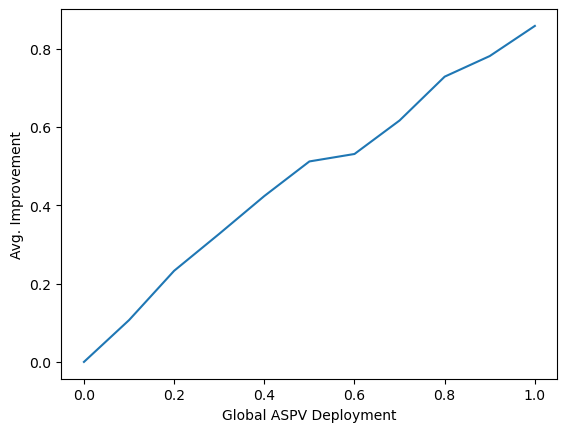

In [4]:
m = df.mean()
m.columns = ["ASPV Deployment Rate", "Avg. Improvement"]
m.plot(x="ASPV Deployment", y="Avg. Improvement", xlabel="Global ASPV Deployment", ylabel="Avg. Improvement")

## Deployment at Edge of AS Network

In [5]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
df = controller.main(BASE_SCENARIO+".pickle", all_asns, "international_edge_defense", verbose=False)

0.1676566796639818
        0.00        0.10        0.25        0.50        0.75        1.00
count  100.0  100.000000  100.000000  100.000000  100.000000  100.000000
mean     0.0    0.012751    0.035025    0.051686    0.076879    0.107607
std      0.0    0.100786    0.154188    0.189946    0.244516    0.299852
min      0.0    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.0    0.000000    0.000000    0.000000    0.000000    0.000000
50%      0.0    0.000000    0.000000    0.000000    0.000000    0.000000
75%      0.0    0.000000    0.000000    0.000000    0.000000    0.025641
max      0.0    1.000000    1.000000    1.000000    1.000000    1.000000


<AxesSubplot: xlabel='ASPV Deployment', ylabel='Avg. Improvement'>

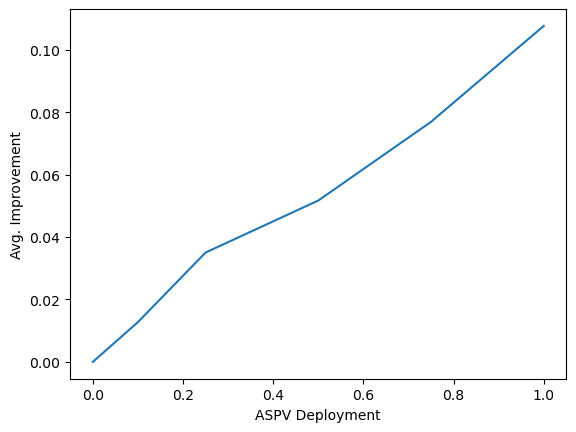

In [6]:
m = df.mean()
m.columns = ["ASPV Deployment Rate", "Avg. Improvement"]
m.plot(x="ASPV Deployment", y="Avg. Improvement", xlabel="Global ASPV Deployment Rate", ylabel="Avg. Improvement")

# Experiment 3

In [5]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
results = controller.main(BASE_SCENARIO+".pickle", all_asns, "aspa_random", verbose=False, iterations=100)
results

0.6910112699394626


array([[0.        , 0.12063799, 0.26317758, 0.45257629, 0.9114981 ],
       [0.        , 0.19814249, 0.37248157, 0.59967094, 0.95371688],
       [0.        , 0.22086261, 0.3520223 , 0.59131908, 0.96389055],
       [0.        , 0.21653468, 0.41350149, 0.65967247, 0.96981132],
       [0.        , 0.27116124, 0.45914167, 0.66309443, 0.97      ]])

## TODO
- Explain how ASPV fails to prevent all leaks in experiment 2
- Verify that edge defense metrics are correct (controller.py:47)
- Change out data source for CAIDA